In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

I start off by loading the dataset from loan_data.csv, a synthetic dataset that is found in Kaggle.

# 1) Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('loan_data.csv')

# Display the first 5 rows of the dataframe
print("Data loaded! Here are the first and last five rows of loan_data.csv:")
df

Data loaded! Here are the first and last five rows of loan_data.csv:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


I will be using a few ways to understand the data better:
1) df.info(): to get a summary of the dataset, including the data types and non-null(non-missing value) counts for each column. 
This can also get the data type of each column, which consists of mainly float64, object, int64, signifying numerical and categorical features.

2) df.duplicated().sum(): to check and provide the count of how many duplicate rows are in the dataset. This is important because duplicate rows can skew the analysis and the model.

3) df.isnull().sum(): to check and provide the count of how many missing values are in the dataset. Missing values can be cleaned through data cleaning process, if any shows up

4) df.describe(): to generate descriptive statistics for numerical columns. This will provide the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each numerical column. This is useful to understand the distribution and central tendency of the data.from the dataset.

In [3]:
# Display a summary of the DataFrame, including data types and non-null counts
print("---------- Data Info ----------")
df.info()

# Check for any duplicate rows
print(f"\n---------- Duplicate Rows ----------\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check for missing values
print(f"\n---------- Missing Values ----------\nNumber of missing values: {df.isnull().sum()}")

# Generate descriptive statistics for numerical columns
print("\n---------- Descriptive Statistics ----------")
df.describe()

---------- Data Info ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Descriptive Statistics Insights:

person_age: The age of individuals in the dataset ranges from 20 to 144. The maximum age of 144 seems improbable and should be investigated further.

person_income: Income varies significantly. The large standard deviation confirms this wide range.

person_emp_exp: Employment experience ranges from 0 to 125 years. Similar to age, 125 years of experience is highly unlikely and needs to be addressed.

# 1.1) Data Cleaning

In [4]:
# Show the shape of the DataFrame before removing improbable values
print("Shape of the dataframe BEFORE removing improbable values:")
print(df.shape)

# Let's consider a max age of 100 and max employment experience of 65
df = df[(df['person_age'] <= 100) & (df['person_emp_exp'] <= 65)]

print("\nShape of the dataframe AFTER removing improbable values:")
print(df.shape)

print("\n--- Descriptive Statistics After Removing Improbable Values ---")
df.describe()

Shape of the dataframe BEFORE removing improbable values:
(45000, 14)

Shape of the dataframe AFTER removing improbable values:
(44992, 14)

--- Descriptive Statistics After Removing Improbable Values ---


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44992.000000,4.499200e+04,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000
mean,27.746955,7.990956e+04,5.392959,9583.245288,11.006448,0.139735,5.866087,632.582592,0.222262
std,5.901543,6.332239e+04,5.917871,6314.856103,2.979019,0.087207,3.875930,50.398623,0.415771
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,84.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


# 2) Exploratory Data Analysis

In [5]:
# List of categorical columns to inspect
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# Loop through the columns and print their unique values
for col in categorical_cols:
    print(f"---------- Unique Values in '{col}' ----------")
    print(df[col].unique())
    print("\n")

---------- Unique Values in 'person_gender' ----------
['female' 'male']


---------- Unique Values in 'person_education' ----------
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


---------- Unique Values in 'person_home_ownership' ----------
['RENT' 'OWN' 'MORTGAGE' 'OTHER']


---------- Unique Values in 'loan_intent' ----------
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


---------- Unique Values in 'previous_loan_defaults_on_file' ----------
['No' 'Yes']




For safety, I will check for any logical inconsistencies in the dataset. 
For example: 

Employment experience cannot be greater than age.

Credit history length cannot be greater than age.

Loan percentage of income should be consistent with the calculated value and not be too off from the actual value.

In [6]:
# --- Check 1: Employment Experience vs. Age ---
print("[CHECK 1] Employment experience greater than age?")
improbable_employment = df[df['person_emp_exp'] > df['person_age']]
if len(improbable_employment) > 0:
    print(f"Result: Found {len(improbable_employment)} improbable rows.")
    print(improbable_employment[['person_age', 'person_emp_exp']])
else:
    print("Result: No rows found where employment experience > age.")

# --- Check 2: Credit History Length vs. Age ---
print("\n[CHECK 2] Credit history longer than age?")
improbable_credit_history = df[df['cb_person_cred_hist_length'] > (df['person_age'])]
if len(improbable_credit_history) > 0:
    print(f"Result: Found {len(improbable_credit_history)} improbable rows.")
    print(improbable_credit_history[['person_age', 'cb_person_cred_hist_length']])
else:
    print("Result: No improbable credit history lengths found.")

# --- Check 3: Loan Percentage of Income Consistency ---
print("\n[CHECK 3] Discrepancy in loan_percent_income calculation?")
# Calculate the percentage ourselves and find the difference
calculated_percent = df['loan_amnt'] / df['person_income']
difference = abs(df['loan_percent_income'] - calculated_percent)

# Find rows where the difference is significant (e.g., more than 1% or 0.01)
significant_diffs = df[difference > 0.01]
if len(significant_diffs) > 0:
    print(f"Result: FOUND {len(significant_diffs)} rows with significant discrepancies.")
    # Create a temporary column to show the calculated value for comparison
    temp_df = significant_diffs.copy()
    temp_df['calculated_percent'] = temp_df['loan_amnt'] / temp_df['person_income']
    print(temp_df[['person_income', 'loan_amnt', 'loan_percent_income', 'calculated_percent']])
else:
    print("Result: Loan to Income percentage is consistent.")

[CHECK 1] Employment experience greater than age?
Result: No rows found where employment experience > age.

[CHECK 2] Credit history longer than age?
Result: No improbable credit history lengths found.

[CHECK 3] Discrepancy in loan_percent_income calculation?
Result: Loan to Income percentage is consistent.


# Graphs

1) Univariate Graph - Explore Individual features

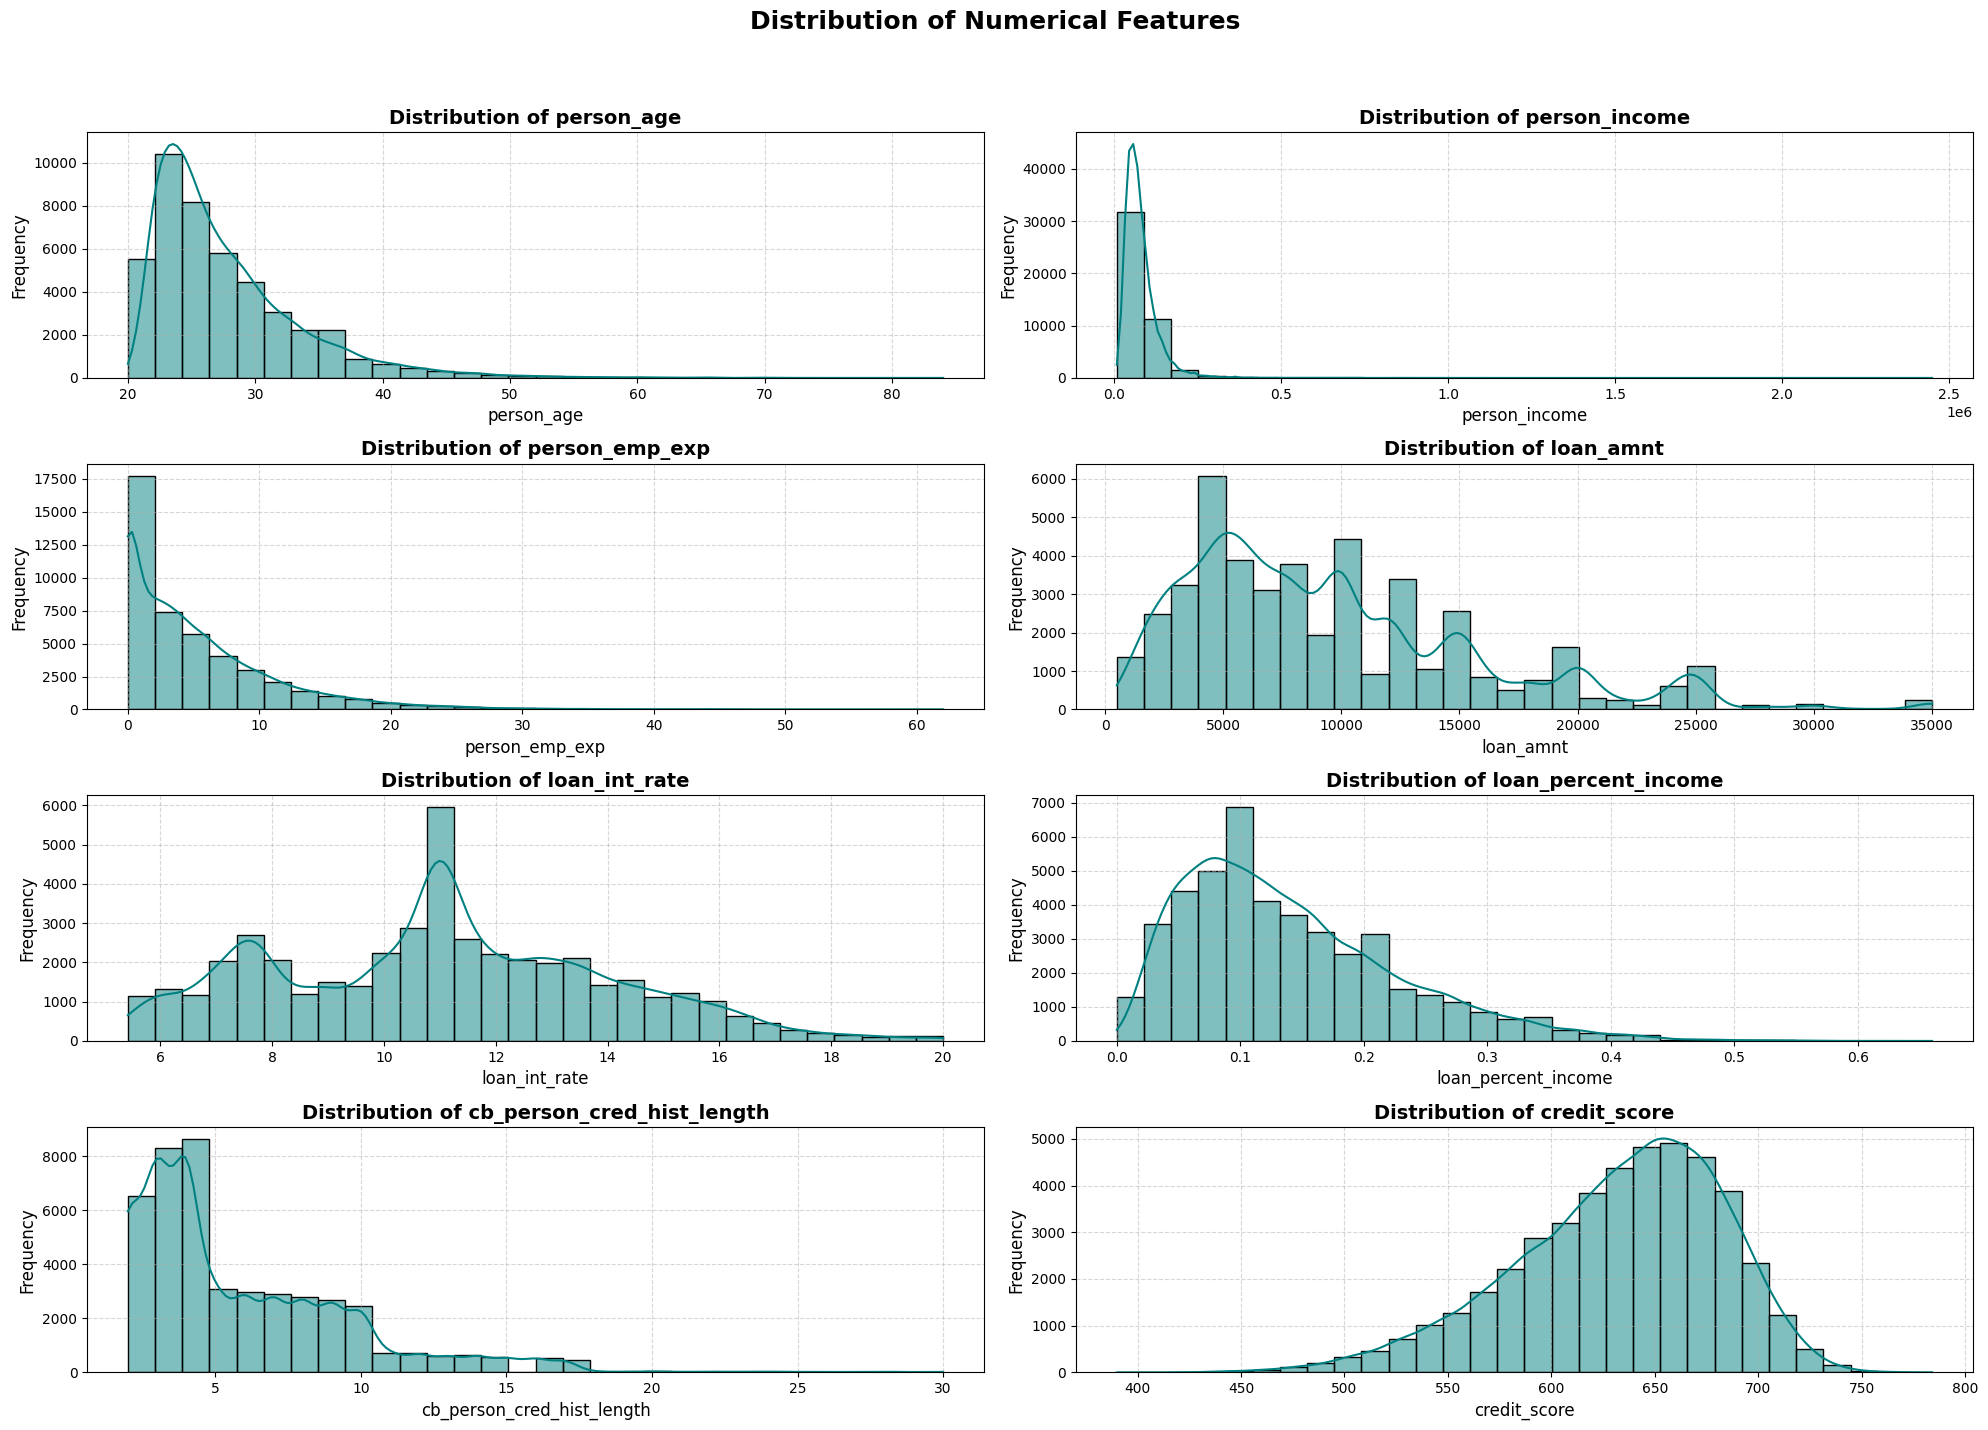

In [7]:
# Define numerical columns
numerical_features = [
    'person_age', 'person_income', 'person_emp_exp',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length', 'credit_score'
]

# Set up figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
axes = axes.flatten()

# Plot each histogram with improved aesthetics
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Final layout tweaks
plt.suptitle('Distribution of Numerical Features', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Below are key observations derived from the histograms:

1. **person_age**:
   - The majority of applicants fall between **25 to 40 years old**.

2. **person_income**:
   - Income is **right-skewed**, with most people earning under **$150,000**.
   - A small number of applicants earn exceptionally high incomes (>$500,000), which could influence the model disproportionately.
   - May benefit from **log transformation** for normalization.

3. **person_emp_exp** (Employment Experience):
   - Most people have less than **25 years** of experience.

4. **loan_amnt**:
   - Majority of loans range between **$2,000 to $15,000**.
   - Appears to be a relatively **normal distribution** with a long right tail.

5. **loan_int_rate** (Interest Rate):
   - Has a **bimodal distribution**, indicating possibly **two different risk groups** (e.g., low-risk vs high-risk borrowers).
   - Averages around **10%–15%**, with some loans charging over **30%** interest.

6. **loan_percent_income** (Loan Amount as % of Income):
   - Most applicants borrow amounts that are **less than 50% of their income**, suggesting responsible borrowing behavior.

7. **cb_person_cred_hist_length**:
   - Many borrowers have a **credit history of 2–6 years**.
   - A very small group has long histories (10+ years), which could affect creditworthiness scores.

8. **credit_score**:
   - Appears roughly **normal**, centered between **500–700**.
   - Applicants with scores below **500** may face higher interest rates or rejection.

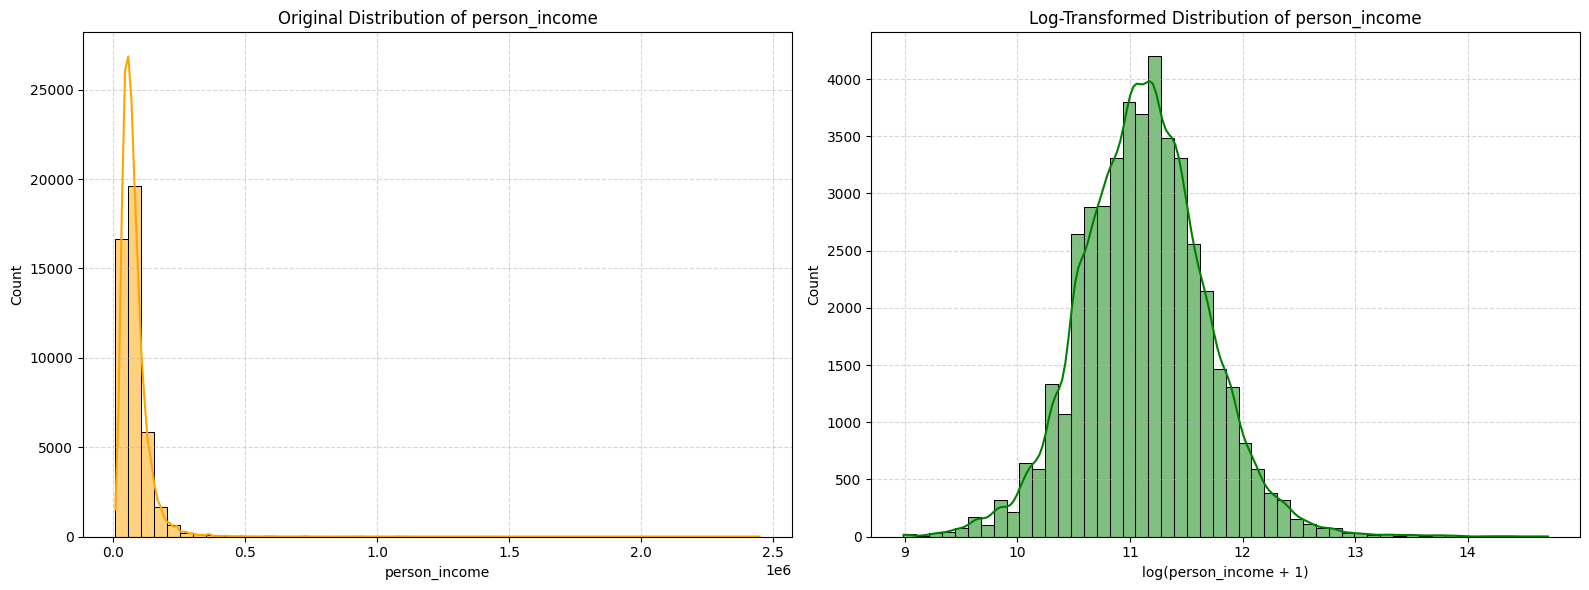

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Original distribution
sns.histplot(df['person_income'], bins=50, kde=True, ax=axs[0], color='orange')
axs[0].set_title('Original Distribution of person_income')
axs[0].set_xlabel('person_income')
axs[0].grid(True, linestyle='--', alpha=0.5)

# Log-transformed (temporary, not saved in df)
sns.histplot(np.log1p(df['person_income']), bins=50, kde=True, ax=axs[1], color='green')
axs[1].set_title('Log-Transformed Distribution of person_income')
axs[1].set_xlabel('log(person_income + 1)')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

- A log value of **11** corresponds to an actual income of roughly **$60,000** (`exp(11) ≈ 59,874`).
- A log value of **14.5** corresponds to **$2 million**.
- A log value of **7** corresponds to **$1,096**.

The person_income feature reveals a highly right-skewed distribution, with the majority of applicants earning under $150,000, while a few earn extremely high incomes exceeding $1 million, up to $7.2 million. This extreme variation introduces high variance and potential model bias toward high-income applicants.

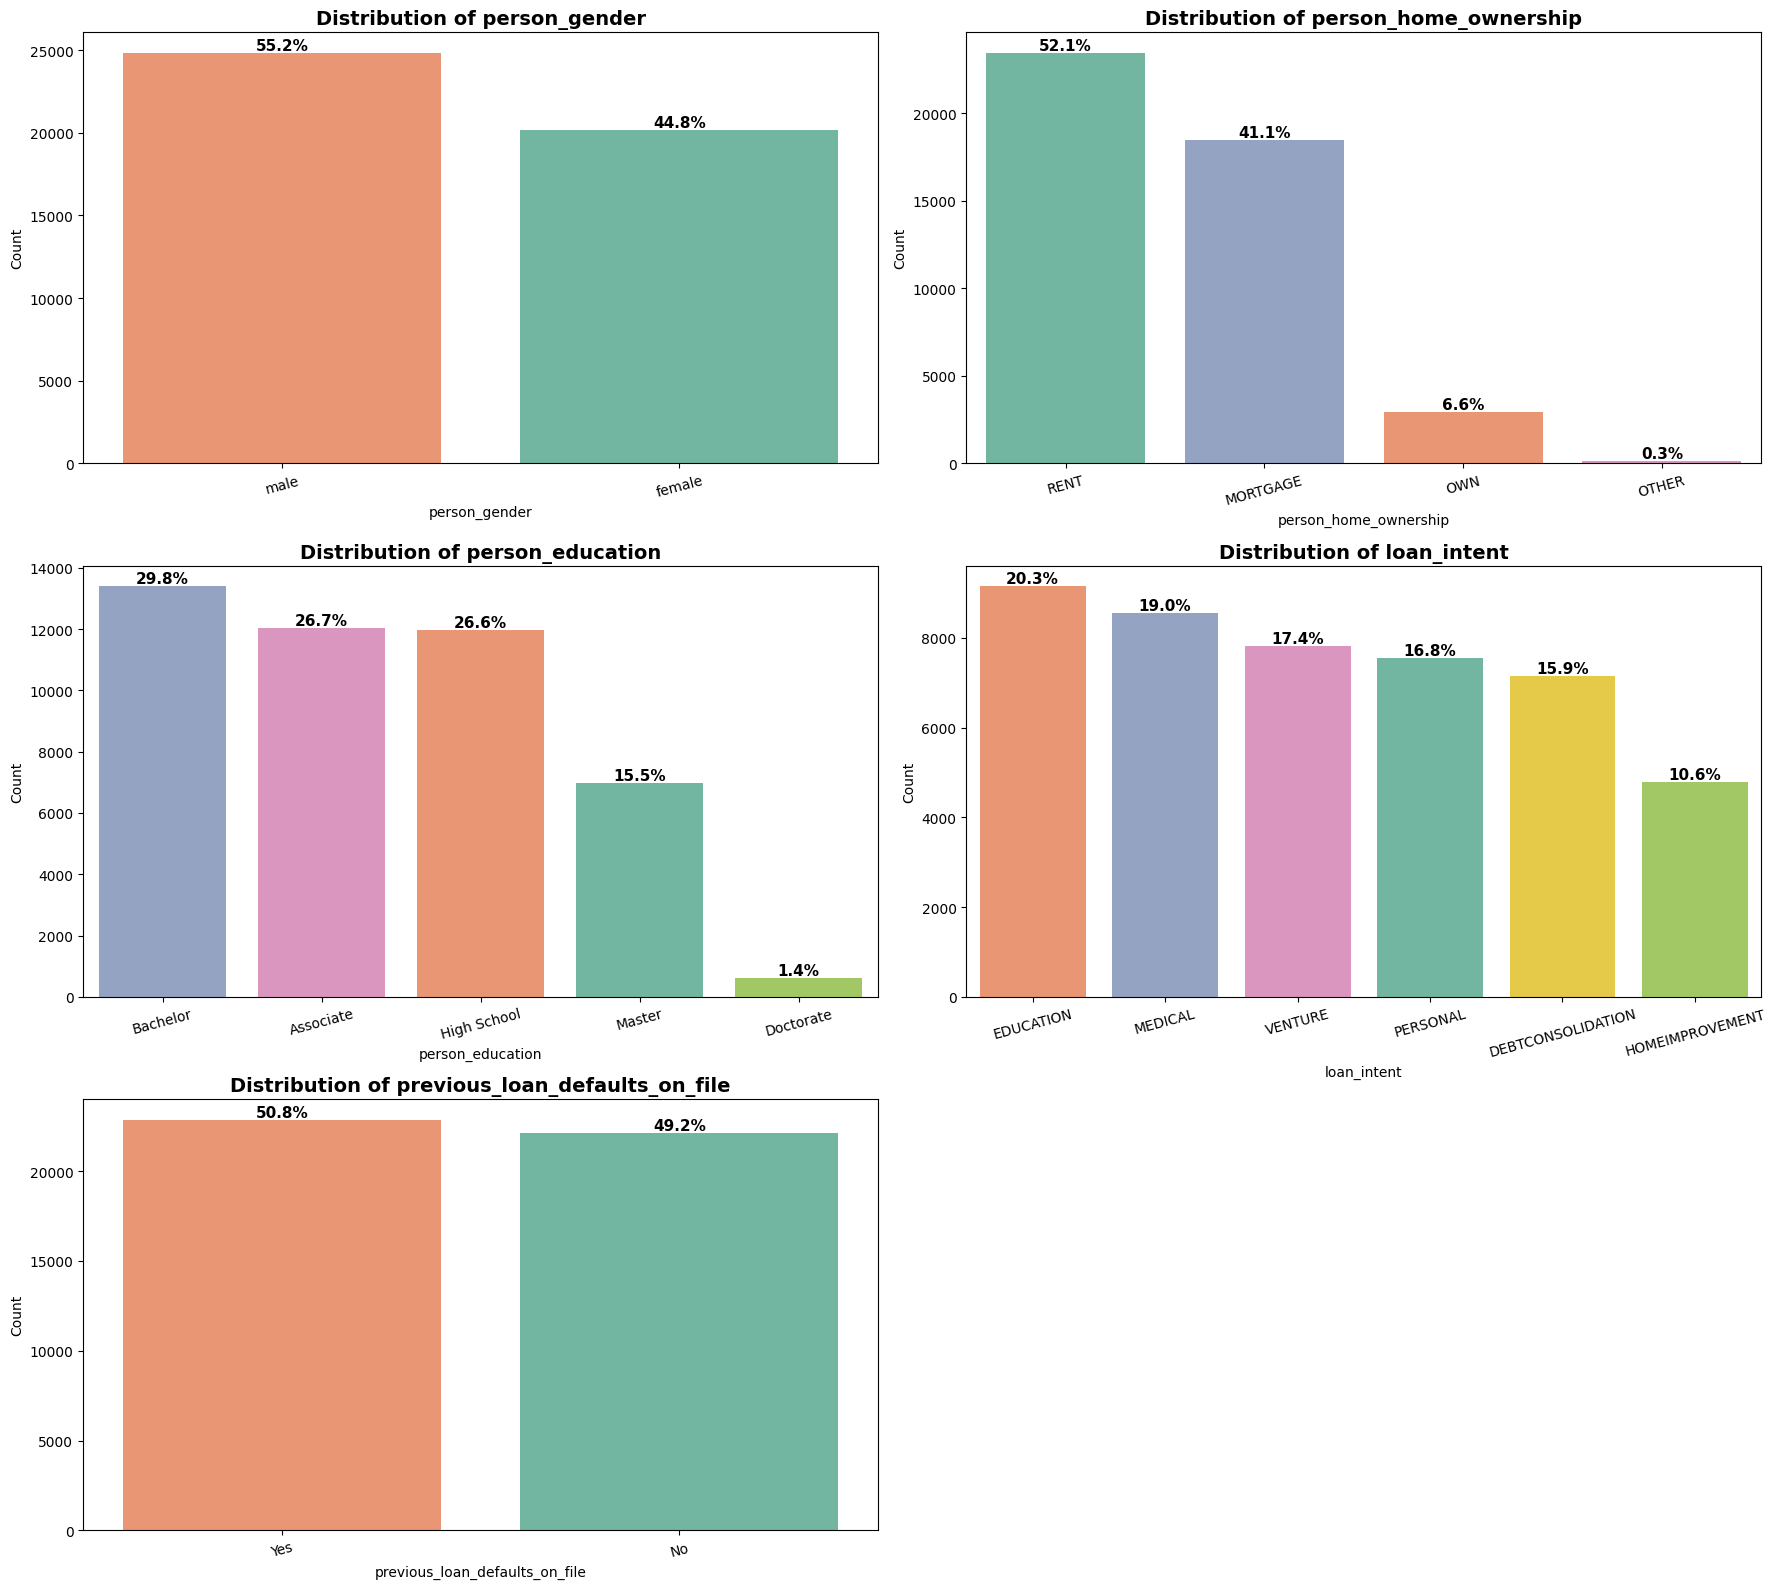

In [9]:
categorical_features = [
    'person_gender',
    'person_home_ownership',
    'person_education',
    'loan_intent',
    'previous_loan_defaults_on_file'    
]

# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 16))
axs = axs.flatten()

# Plot each categorical feature with percentage annotations
for i, col in enumerate(categorical_features):
    ax = axs[i]
    order = df[col].value_counts().index
    total = len(df)
    
    # Plot
    sns.countplot(data=df, x=col, ax=ax, palette='Set2', order=order, hue=col, legend=False)
    
    # Title and labels
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=15)

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        percent = 100 * height / total
        ax.annotate(f'{percent:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=11, fontweight='semibold')

# Remove any unused subplots
for j in range(len(categorical_features), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

1. person_gender
55.2% of applicants are male, and 44.8% are female.

The dataset has a slight male dominance, but gender distribution is fairly balanced.

2. person_home_ownership
Majority of applicants rent (52.1%) or have a mortgage (41.1%).

Only a small portion own (6.6%) their home, and other categories are negligible.

Renting or mortgage status may reflect financial flexibility and risk.

3. person_education
Most applicants have Bachelor’s (29.8%), Associate (26.7%), or High School (26.6%) education.

Only 15.5% have a Master’s, and Doctorate holders are rare (1.4%).

Indicates the dataset is largely composed of mid-education level applicants.

4. loan_intent
Top 3 purposes for loans are Education (20.3%), Medical (19.0%), and Venture (17.4%).

Others include Personal, Debt Consolidation, and Home Improvement.

Shows that most loans are for productive or essential needs.

5. previous_loan_defaults_on_file
Nearly evenly split: 50.8% of applicants have defaulted before, while 49.2% have no past defaults.

This feature may be highly predictive of future loan risk and is important for modeling.

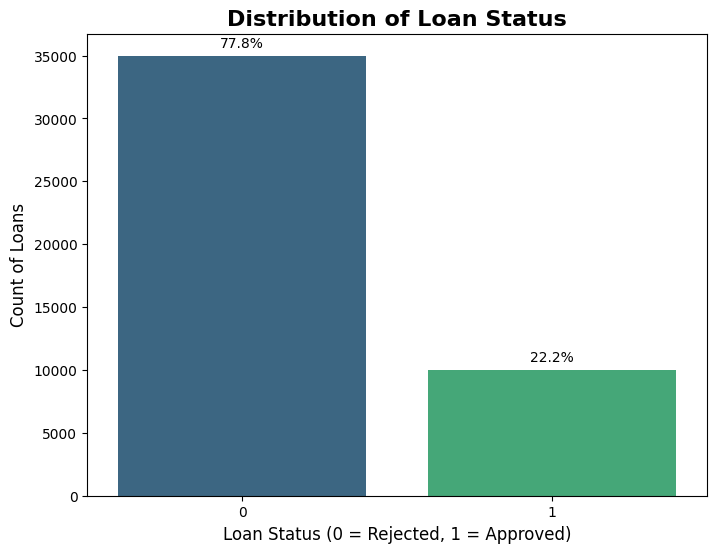

--- Target Variable Distribution ---
loan_status
0    0.777738
1    0.222262
Name: proportion, dtype: float64


In [10]:
# Create a count plot for the Loan Status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_status', data=df, palette='viridis', hue='loan_status', legend=False)

# Add clear labels and a title
plt.title('Distribution of Loan Status', size=16, fontweight='bold')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)', size=12)
plt.ylabel('Count of Loans', size=12)

# Add data labels (percentages) on top of each bar for clarity
total = len(df['loan_status'])
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

# Print the exact percentage for the report
print("--- Target Variable Distribution ---")
print(df['loan_status'].value_counts(normalize=True))

This graph shows the distribution of the loan_status, with 0 being rejected, and 1 being approved. I can conclude from this that there is a imbalance in this dataset, being more favoured to rejected loan statuses

2) Bivariate Graphs - Explore features vs target

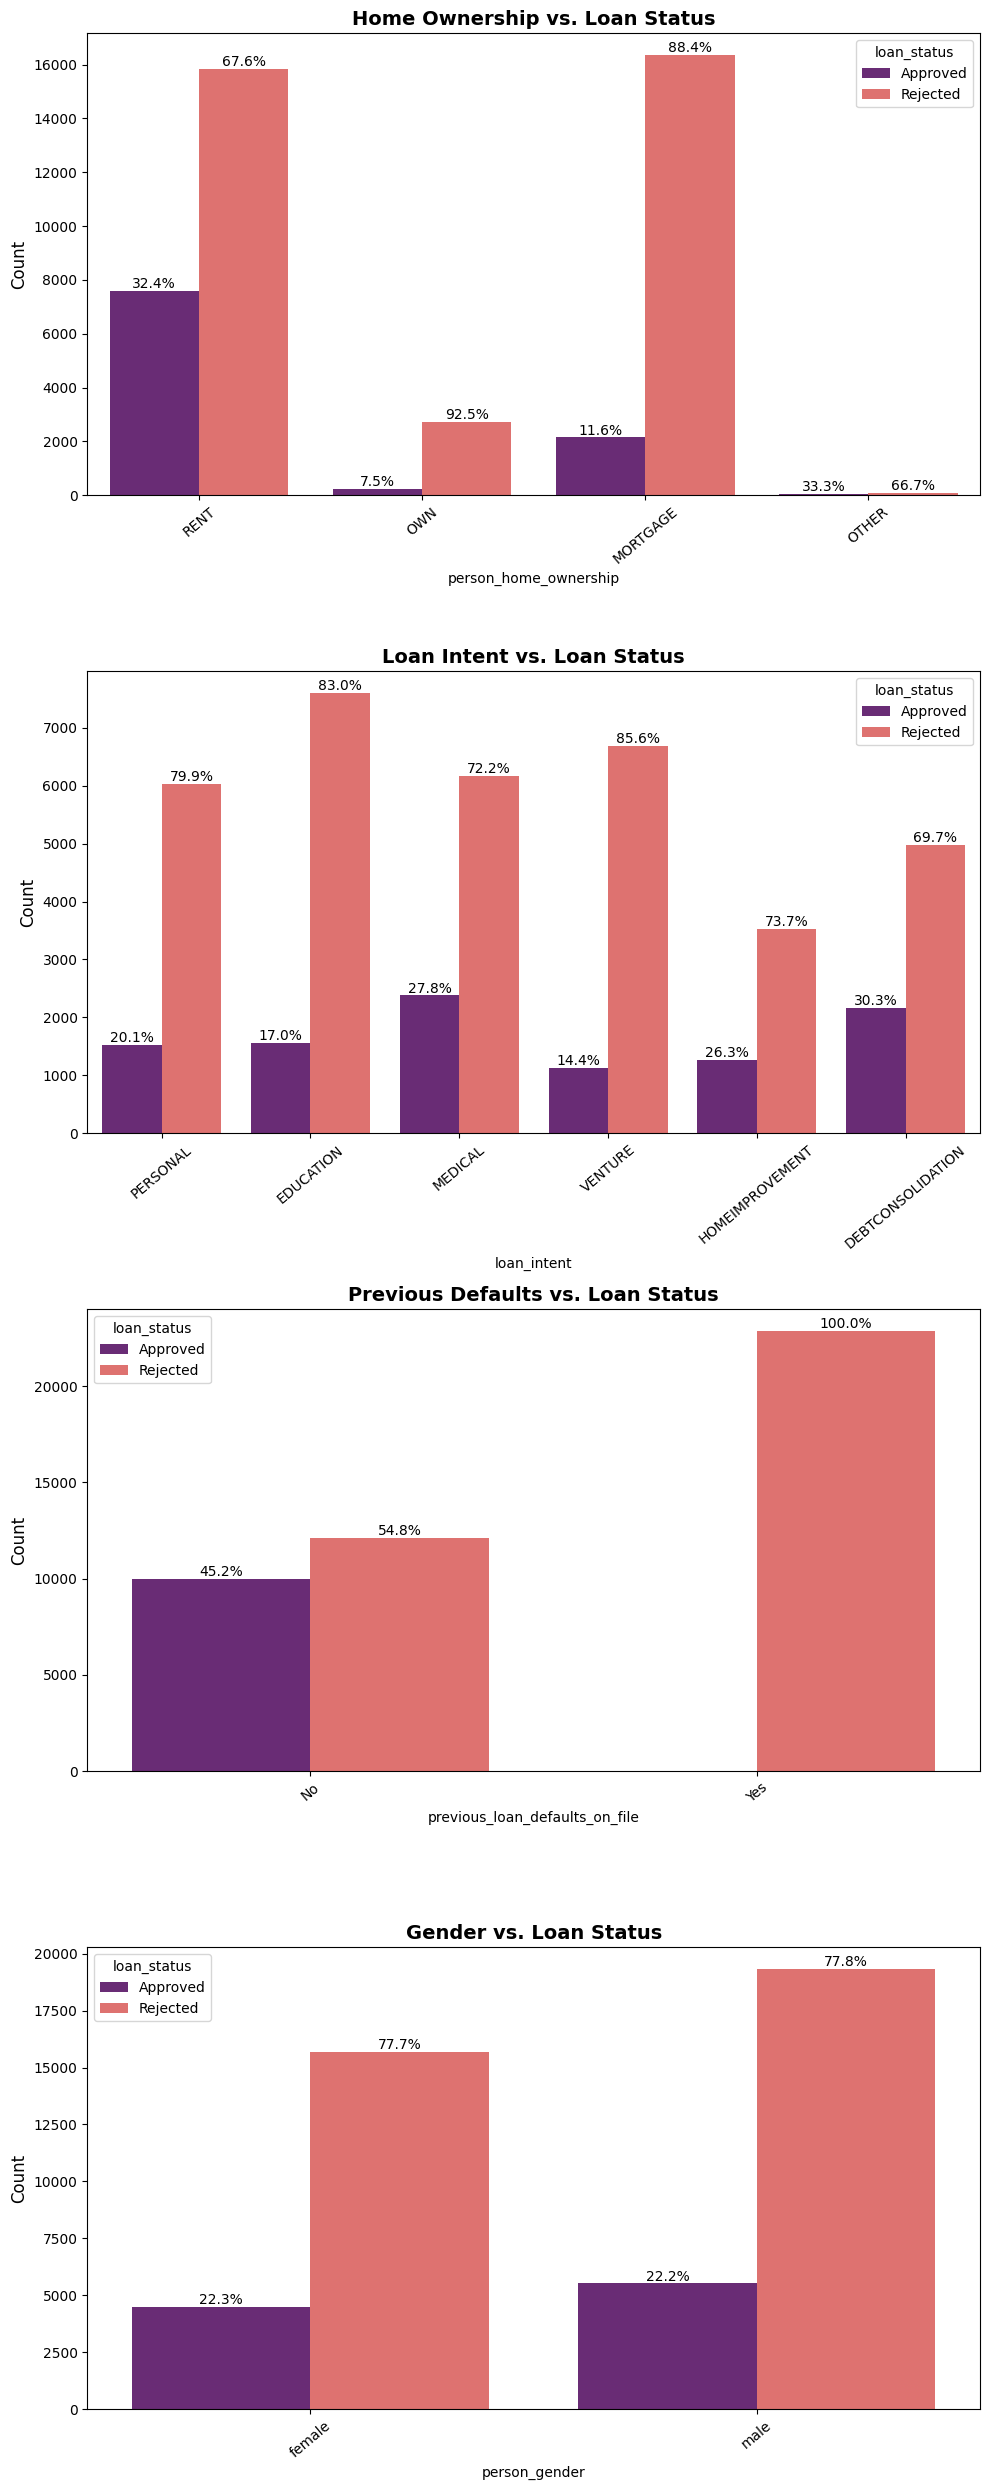

In [11]:
df_viz = df.copy()

# Map the numerical loan_status to descriptive labels for a clearer plot legend
df_viz['loan_status'] = df_viz['loan_status'].map({1: 'Approved', 0: 'Rejected'})

# Create a dictionary to hold pretty names for our plot titles
pretty_names = {
    'person_home_ownership': 'Home Ownership vs. Loan Status',
    'loan_intent': 'Loan Intent vs. Loan Status',
    'previous_loan_defaults_on_file': 'Previous Defaults vs. Loan Status',
    'person_gender': 'Gender vs. Loan Status'
}

# List of categorical features to analyze
categorical_features_to_plot = ['person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'person_gender']

# Create a figure with a 1x4 grid of subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 25))

# Loop through each feature and create the plot on its respective axis
for i, feature in enumerate(categorical_features_to_plot):
    ax = axes[i]
    
    # Create the count plot with the hue for loan_status
    sns.countplot(x=feature, hue='loan_status', data=df_viz, ax=ax, palette='magma')
    
    # This method calculates the percentage for each bar based on the total count 
    # within its own x-axis category (e.g., total for 'RENT', total for 'OWN', etc.)
    
    # Calculate the totals for each category in the current feature
    totals = df_viz.groupby(feature).size()

    # Iterate through the bars (patches) on the current axis
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            # Get the x-tick label for the current bar's position
            # This gives us the category name (e.g., 'RENT')
            x_label_index = int(round(p.get_x() + p.get_width() / 2 - ax.get_xticks()[0]))
            x_label = ax.get_xticklabels()[x_label_index].get_text()

            # Get the total count for that specific category
            total_for_bin = totals[x_label]
            
            # Calculate and format the percentage
            percentage = f'{100 * height / total_for_bin:.1f}%'
            
            # Get the coordinates to place the text
            x = p.get_x() + p.get_width() / 2
            y = height
            
            # Add the text label to the plot
            ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    # Set the title and rotate x-axis labels for readability
    ax.set_title(pretty_names[feature], size=14, fontweight='bold')
    ax.set_xlabel(feature) # Remove individual x-labels to avoid clutter
    ax.set_ylabel('Count', size=12)
    ax.tick_params(axis='x', rotation=40)
    
plt.tight_layout()
plt.show()

Home Ownership vs Loan Status
- Renters (67.6%) and Mortgage holders (88.4%) have higher rejection rates.
- Surprisingly, homeowners (92.5%) are also mostly rejected.
- This suggests home ownership doesn't strongly protect against rejection — possibly because it correlates with higher loan amounts or risk factors.

Loan Intent vs Loan Status
- Banks approve loans for those who loan intents are for Debt Consolidation and Medical.
- They reject most loan types heavily.

Previous Defaults vs Loan Status
- Applicants with no past defaults are split: ~54.8% rejected, 45.2% approved.
- All applicants with previous defaults were rejected — 0% approval, suggesting past defaults will get a loan rejected.

Gender vs Loan Status
- Both males (77.8%) and females (77.7%) have nearly identical rejection rates.
- Gender has no meaningful impact on approval, making it a likely non-informative feature.

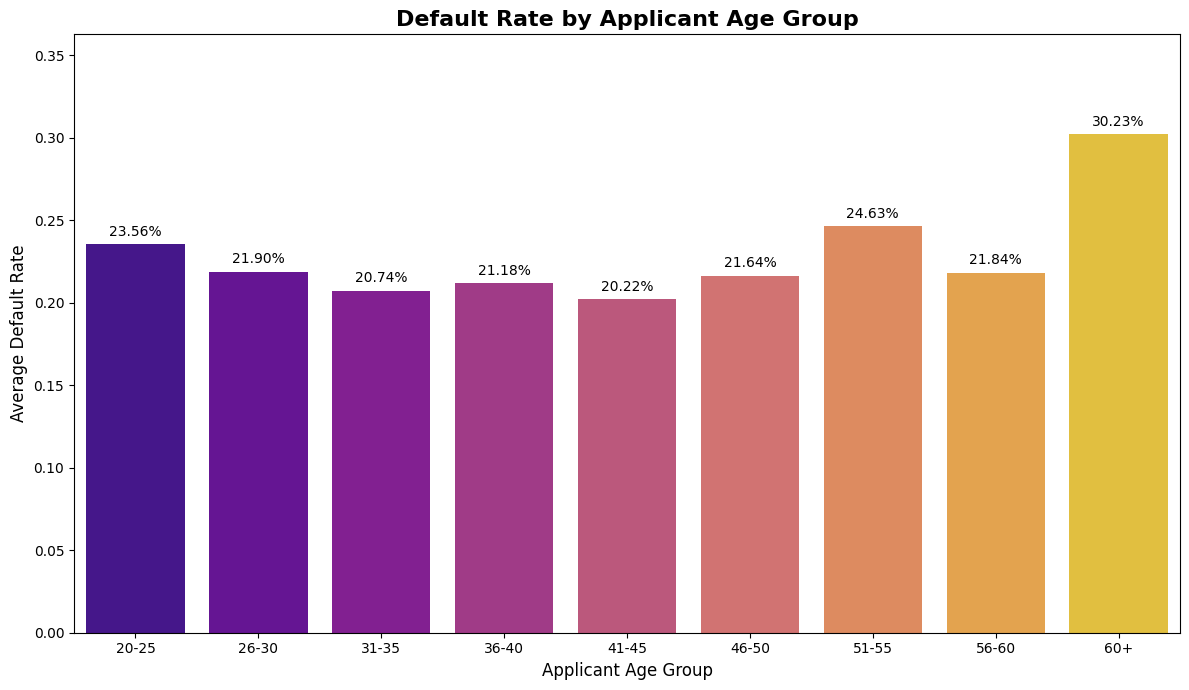

In [12]:
# Ensure df is not a view
df = df.copy()

# Create age_group safely
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 101]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '60+']
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)

# Compute default rate per age group
age_group_default_rate = df.groupby('age_group', observed=True)['loan_status'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='age_group', y='loan_status', data=age_group_default_rate, palette='plasma', hue='age_group')
plt.title('Default Rate by Applicant Age Group', size=16, fontweight='bold')
plt.xlabel('Applicant Age Group', size=12)
plt.ylabel('Average Default Rate', size=12)
plt.legend([], [], frameon=False)

# Annotate % values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.ylim(0, age_group_default_rate['loan_status'].max() * 1.2)
plt.tight_layout()
plt.show()


Default Rate by Age Groups
- Applicants towards both ends appear to have higher default rates, signifying a U-shaped risk pattern.
- Applicants towards 26-50 and 56-60 have lower default rates, suggesting better reliability to return loans.

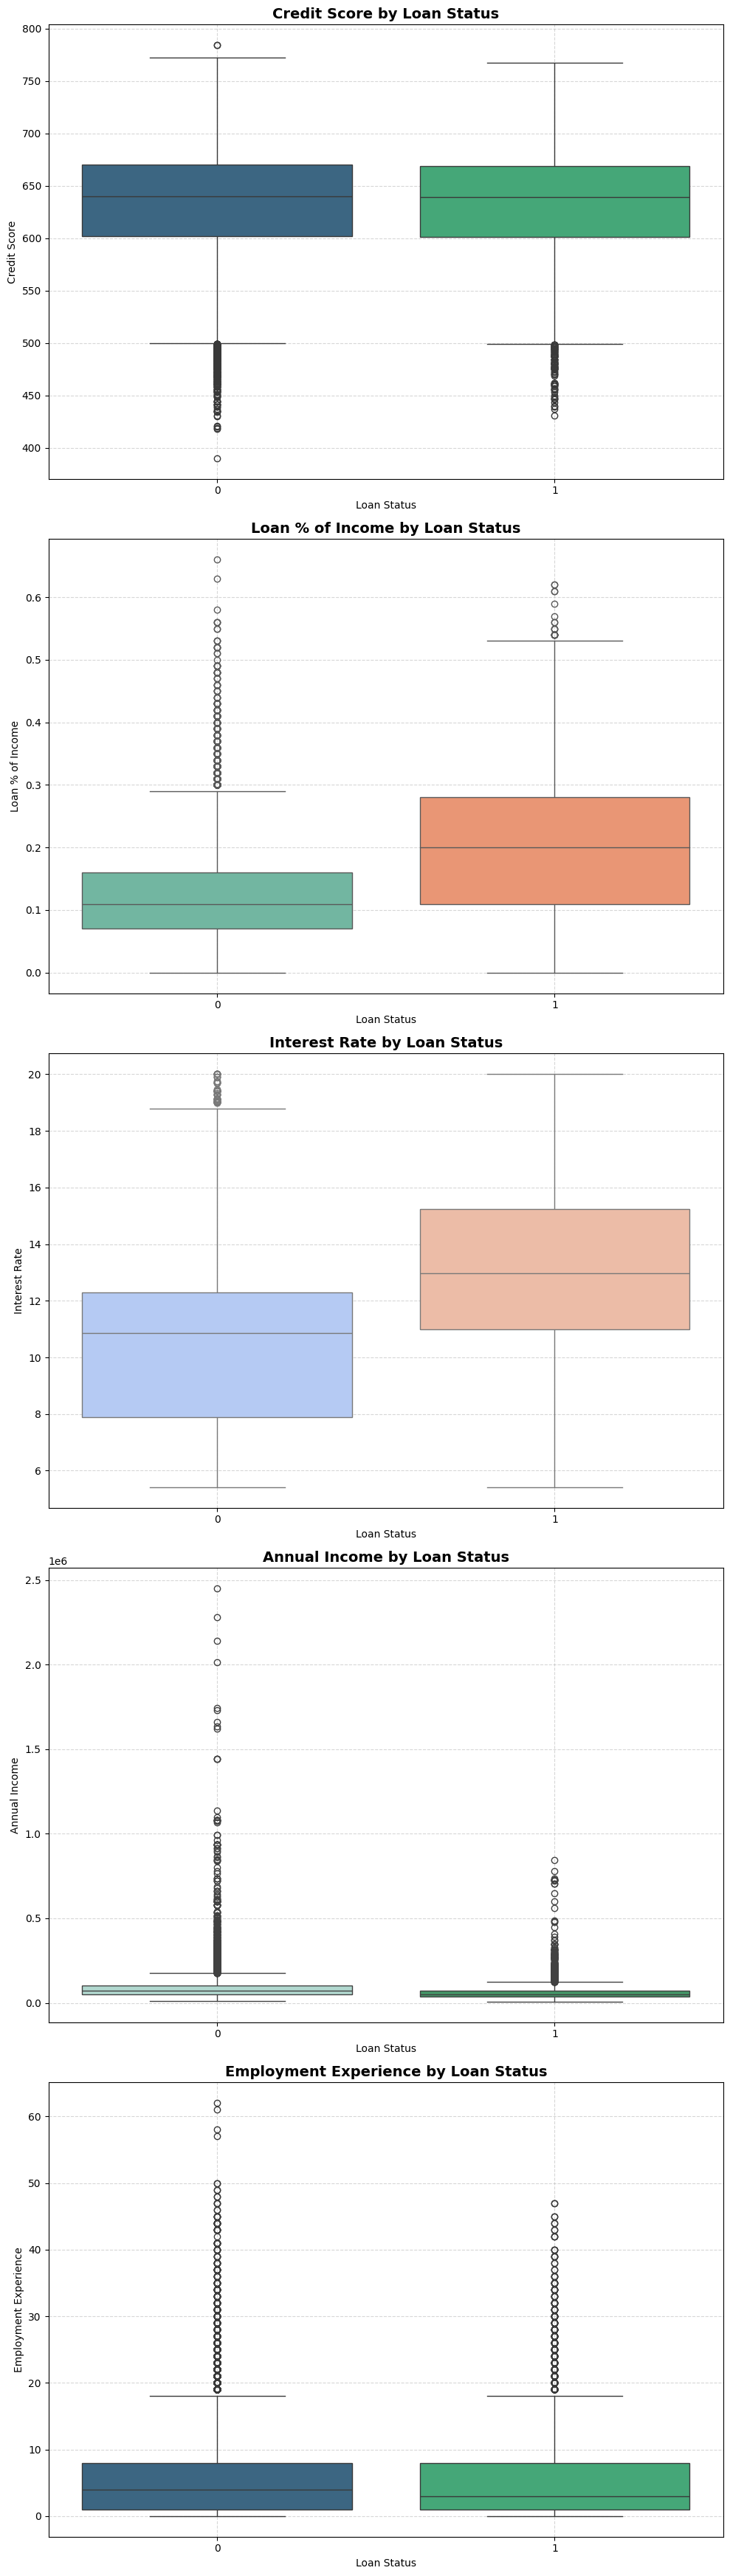

In [13]:
fig, axes = plt.subplots(5, 1, figsize=(10, 35))

# Plot 1: Credit Score
sns.boxplot(x='loan_status', y='credit_score', data=df, hue='loan_status',
            palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('Credit Score by Loan Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Credit Score')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: Loan Percent Income
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, hue='loan_status',
            palette='Set2', ax=axes[1], legend=False)
axes[1].set_title('Loan % of Income by Loan Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Loan % of Income')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Plot 3: Loan Interest Rate
sns.boxplot(x='loan_status', y='loan_int_rate', data=df, hue='loan_status',
            palette='coolwarm', ax=axes[2], legend=False)
axes[2].set_title('Interest Rate by Loan Status', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Interest Rate')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Plot 4: Annual Income
sns.boxplot(x='loan_status', y='person_income', data=df, hue='loan_status',
            palette='BuGn', ax=axes[3], legend=False)
axes[3].set_title('Annual Income by Loan Status', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Loan Status')
axes[3].set_ylabel('Annual Income')
axes[3].grid(True, linestyle='--', alpha=0.5)

# Plot 5: Employment Experience
sns.boxplot(x='loan_status', y='person_emp_exp', data=df, hue='loan_status',
            palette='viridis', ax=axes[4], legend=False)
axes[4].set_title('Employment Experience by Loan Status', fontsize=14, fontweight='bold')
axes[4].set_xlabel('Loan Status')
axes[4].set_ylabel('Employment Experience')
axes[4].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Credit Score by Loan Status
- Approved applicants tend to have slightly higher credit scores (median around 660) compared to rejected ones (median around 640), not very large difference
- This suggests credit score is somewhat important, but not the sole deciding factor.

Loan Percentage of Income by Loan Status
- Approved applicants tend to borrow a larger percentage of their income
- Rejected applicants request smaller % loans, which may suggest:
    - They’re denied for other reasons (e.g., bad credit, defaults).
    - Lenders might tolerate higher debt ratios if other factors (like income or score) are strong.

Interest Rates by Loan Status
- Approvaed applicants tend to receive higher interest rates than rejected ones

Annual Income by Loan Status
- Due to large outliers, it is hard for visualisation. I'll create a copy of this DataFrame to remove these outliers first.

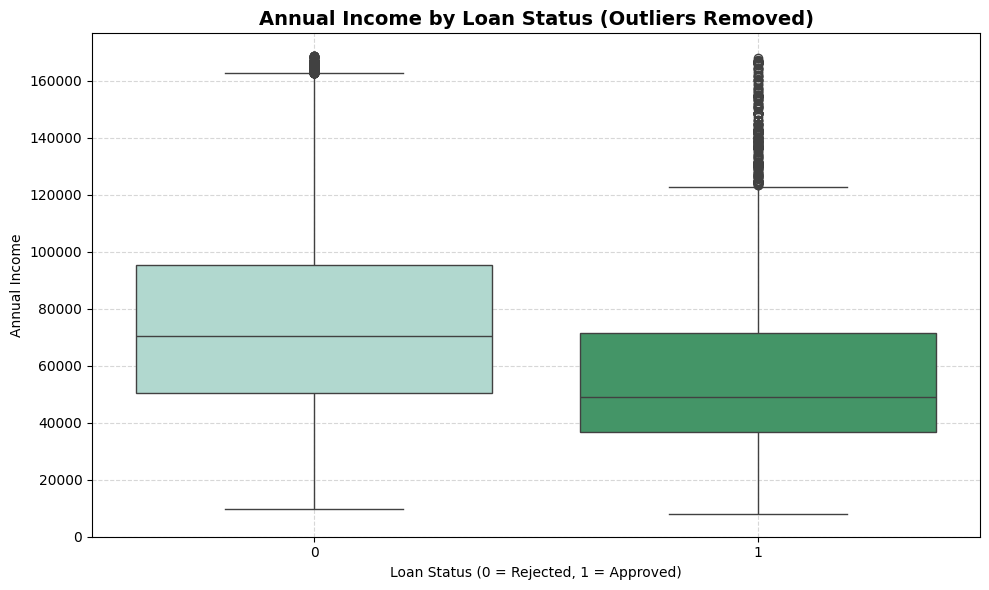

In [14]:
df_temp_income_outlier = df.copy()

# Step 2: Remove outliers using IQR method
Q1 = df_temp_income_outlier['person_income'].quantile(0.25)
Q3 = df_temp_income_outlier['person_income'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter for visualization only
df_income_filtered = df_temp_income_outlier[df_temp_income_outlier['person_income'] <= upper_bound]

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_income', data=df_income_filtered, palette='BuGn', hue='loan_status', legend=False)
plt.title('Annual Income by Loan Status (Outliers Removed)', fontsize=14, fontweight='bold')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Annual Income')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This shows that Applicants who has a higher annual income are more likely to be rejected
- It suggests that income alone may not be a key approval factor
- Applicants with higher income may ask for larger loans, pushing the risk
- Other variables can carry more weight in approval decisions

3) Multivariate Analysis - Correlation Heatmap

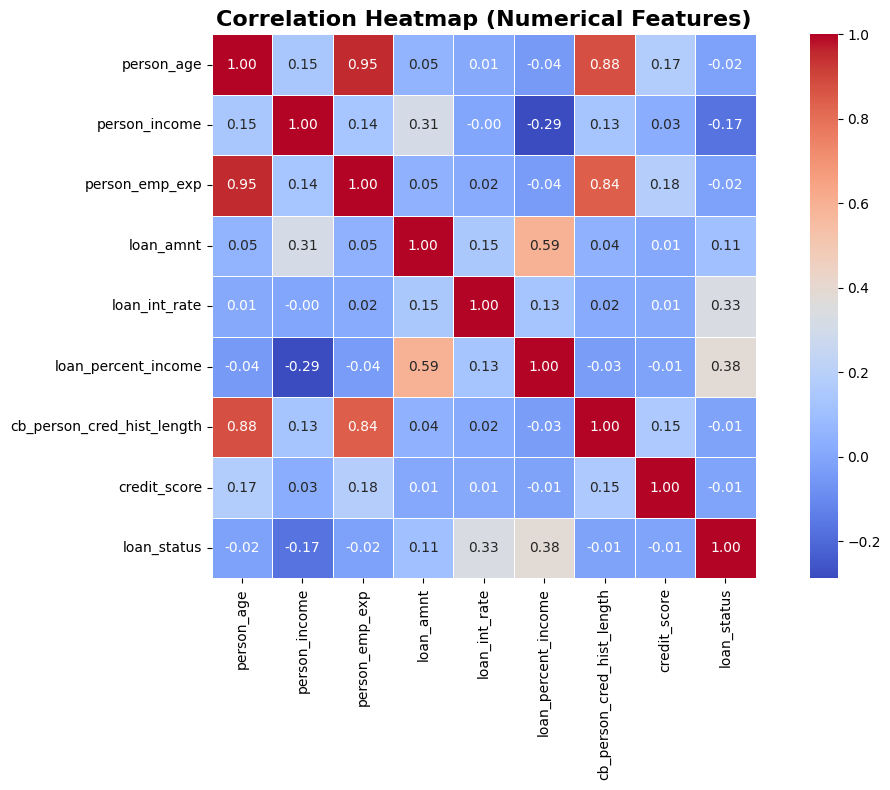

In [15]:
# Select only numerical features
numerical_features = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

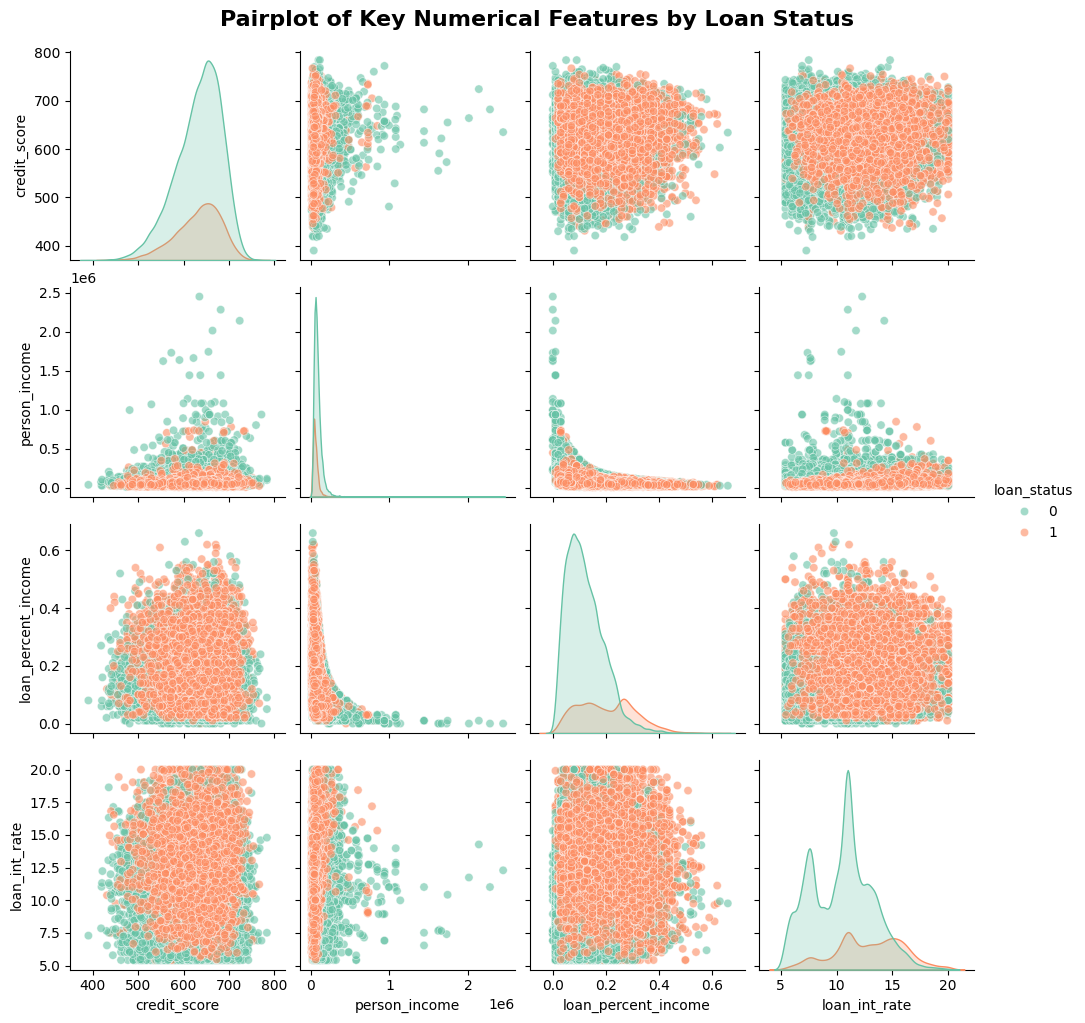

In [16]:
# Select key features
pairplot_features = ['credit_score', 'person_income', 'loan_percent_income', 'loan_int_rate', 'loan_status']

# Create the pairplot
sns.pairplot(df[pairplot_features], hue='loan_status', palette='Set2', plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('Pairplot of Key Numerical Features by Loan Status', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 3) Pre-processing

1) Data Cleaning - I will leave this blank as I have done it for age and employment experience at initial exploration.

- Although there are clear outliers in person_income and loan_int_rate, I chose to let them stay as in real-world loan approvals, it is possible to encounter such high income applicants or high interest rates delibrately set for high-risk applications
- Removing these values would reduce the model's ability to generalize to real deployment scenarios

- I would also be most likely using Tree-based models which can handle outliers well

- I can do feature engineering if needed later.

2) Feature Selection

- Based on EDA, I decided to drop these two columns:

 - 1) 'age_group' - this is solely for visualisation purposes and I want to use the raw values for training
 - 2) 'person_gender' - gender typically have a low feature importance in deciding whether a loan gets approved or not.Evident from the fact that the rejected and approved ratio for male and females are almost identical.

In [17]:
df = df.drop(columns=['person_gender', 'age_group'])

3) One-Hot Encoding - Turn Categorical Features to Bool dtype for train/test split later on

In [18]:
categorical_cols = [
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]

df_encoded = pd.get_dummies(
    df, 
    columns=categorical_cols,
    drop_first=False 
)

df_encoded

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_education_Associate,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,False,True,False,False,False,False,True,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,True,False,False,True,False,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,True,False,False,True,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,True,False,False,False,True,False,False,True,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1,True,...,False,True,False,False,False,True,False,False,True,False
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,True,...,False,True,False,False,True,False,False,False,True,False
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1,True,...,False,True,True,False,False,False,False,False,True,False
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1,False,...,False,True,False,True,False,False,False,False,True,False


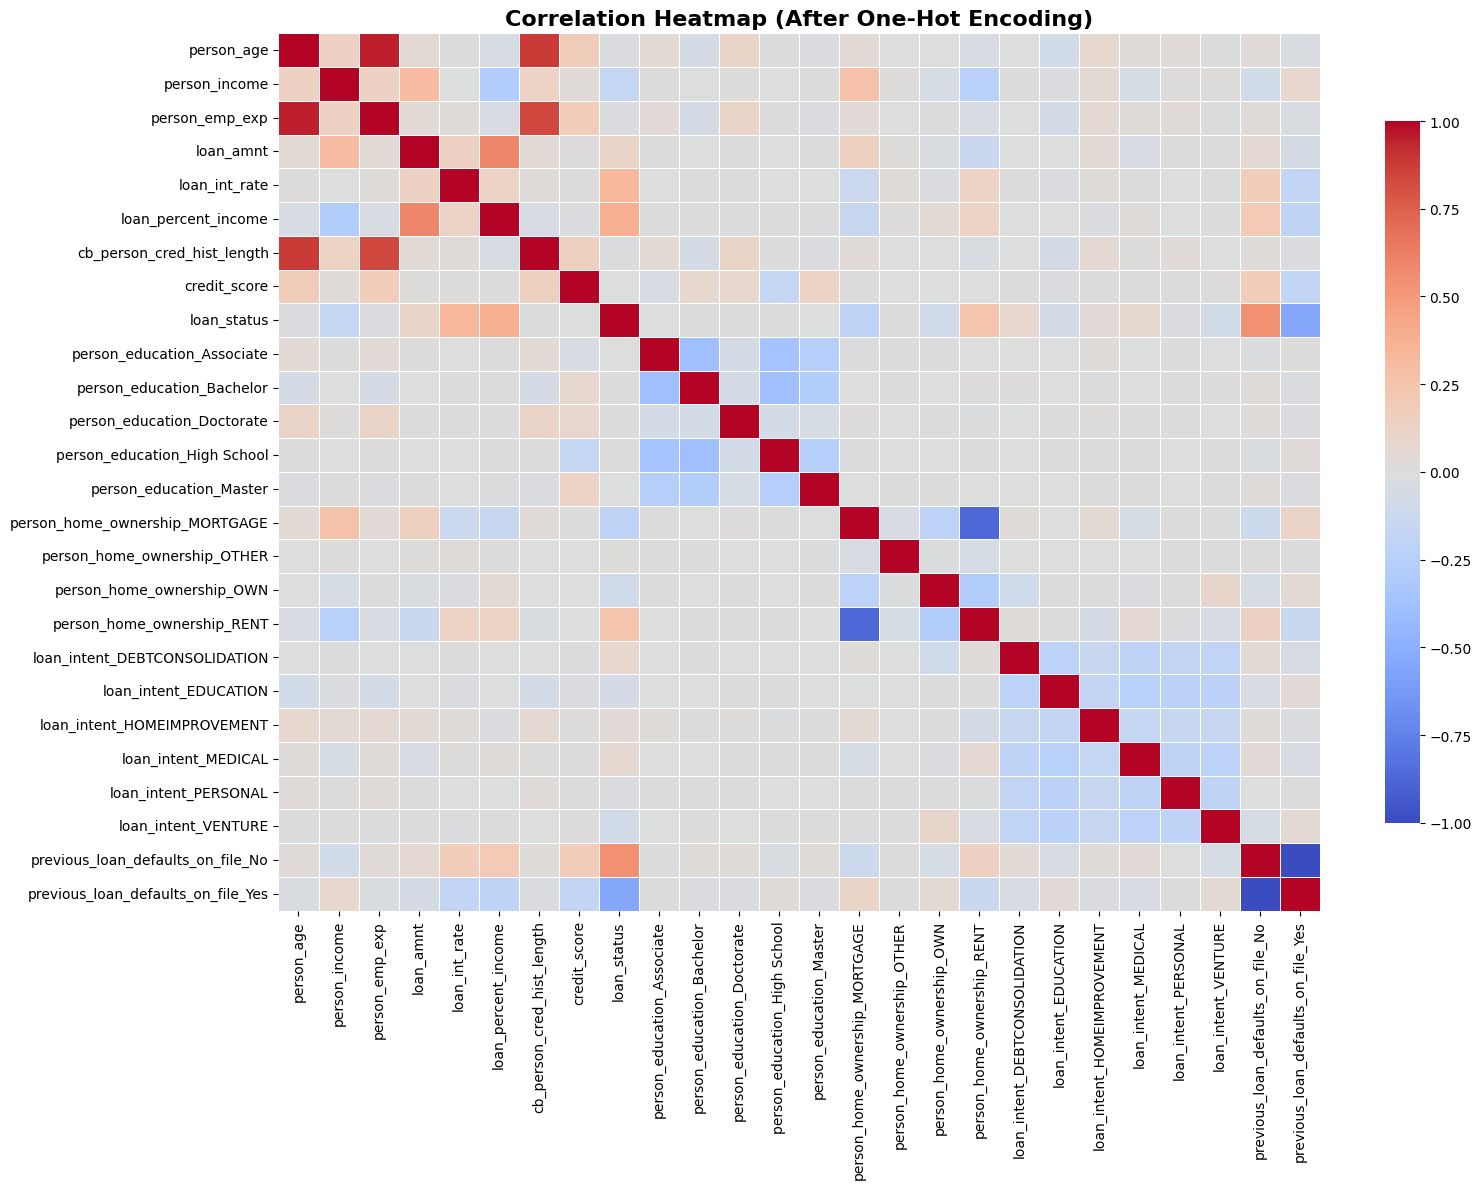

,Correlation with loan_status
previous_loan_defaults_on_file_No,0.543
loan_percent_income,0.385
loan_int_rate,0.332
person_home_ownership_RENT,0.255
loan_amnt,0.108
loan_intent_DEBTCONSOLIDATION,0.084
loan_intent_MEDICAL,0.065
loan_intent_HOMEIMPROVEMENT,0.034
person_home_ownership_OTHER,0.014
person_education_Bachelor,0.005


In [19]:
# Compute correlation matrix for all numeric columns
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap (After One-Hot Encoding)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

loan_status_corr = df_encoded.corr()['loan_status'].drop('loan_status').sort_values(ascending=False)
loan_status_corr_df = loan_status_corr.to_frame(name='Correlation with loan_status')
display(loan_status_corr_df.round(3))

###  Insights from Correlation Heatmap

- **`loan_percent_income`** and **`loan_int_rate`** show **positive correlation** with `loan_status`, suggesting that applicants requesting large loans relative to their income, or with higher interest rates, are more likely to be rejected.
  
- **`credit_score`** shows a **negative correlation** with `loan_status`, confirming that higher credit scores are associated with more approvals.

- One-hot encoded features such as **loan_intent categories** and **previous_loan_defaults_on_file`[1]`** may show moderate correlation with `loan_status`, supporting their inclusion.

- Most features are **weakly correlated with each other**, which is good — it reduces risk of redundancy or multicollinearity.

### Insights from Correlation Table
- **`previous_loan_defaults_on_file`** has the strongest correlation, confirming its power as a predictor.

- **`loan_percent_income and loan_int_rate`** are both positively correlated, suggesting higher risk leads to more rejections.

- **`person_income and credit_score`** show weak negative correlation, supporting the earlier EDA

# 4) Train-test Split

In [20]:
# Split features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']


# Employ stratified 80%/20% Train-test split to maintain the distribution of the target variable 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

# 5) Model Training & Evaluation

Logistic Regression
- A baseline linear model that is interpretable and effective for binary classification. class_weight='balanced' helps address class imbalance.

Random Forest
- A powerful ensemble method that reduces overfitting by averaging multiple decision trees. It handles both numerical and categorical features well.

Gradient Boosting
- A robust boosting technique that focuses on difficult examples and often delivers high accuracy, making it suitable for performance benchmarking.

K-Nearest Neighbors (KNN)
- A simple, non-parametric model that serves as a useful contrast to tree-based models. Good for detecting local patterns in data.

Decision Tree
- A fundamental model that offers visual interpretability and serves as the building block for ensemble methods like Random Forest and Gradient Boosting.


--- Evaluating: Logistic Regression ---

Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6999
           1       0.61      0.91      0.73      2000

    accuracy                           0.85      8999
   macro avg       0.79      0.88      0.82      8999
weighted avg       0.89      0.85      0.86      8999



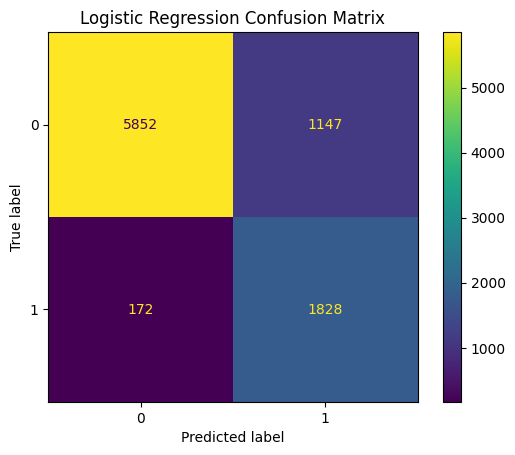


--- Evaluating: Random Forest ---

Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6999
           1       0.90      0.76      0.83      2000

    accuracy                           0.93      8999
   macro avg       0.92      0.87      0.89      8999
weighted avg       0.93      0.93      0.93      8999



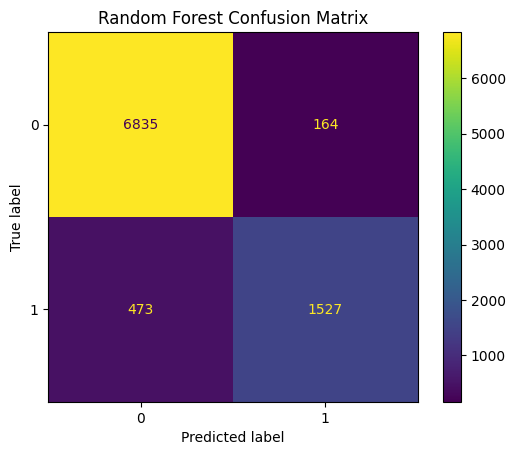


--- Evaluating: Gradient Boosting ---

Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6999
           1       0.89      0.76      0.82      2000

    accuracy                           0.93      8999
   macro avg       0.91      0.87      0.89      8999
weighted avg       0.92      0.93      0.92      8999



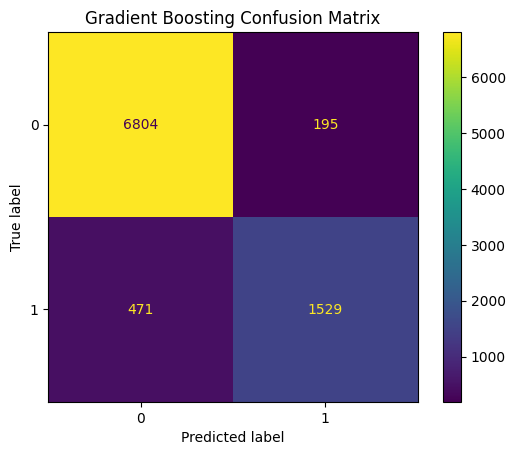


--- Evaluating: K-Nearest Neighbors ---

K-Nearest Neighbors
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6999
           1       0.79      0.70      0.74      2000

    accuracy                           0.89      8999
   macro avg       0.85      0.82      0.84      8999
weighted avg       0.89      0.89      0.89      8999



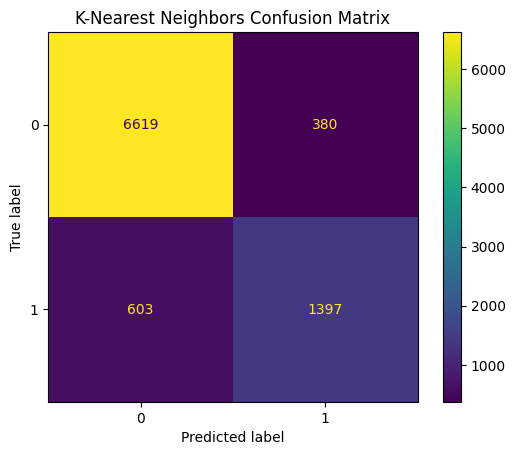


--- Evaluating: Decision Tree ---

Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6999
           1       0.80      0.78      0.79      2000

    accuracy                           0.91      8999
   macro avg       0.87      0.86      0.87      8999
weighted avg       0.91      0.91      0.91      8999



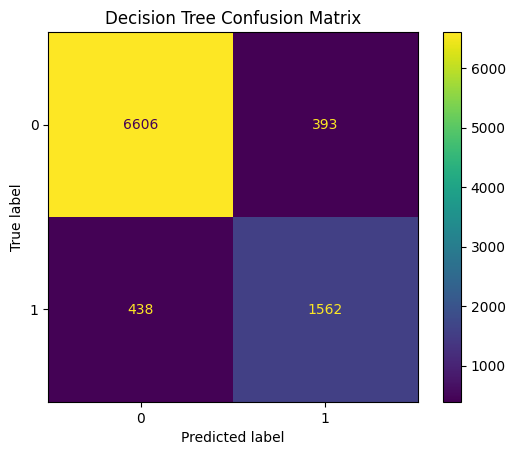


Summary of Model Performance (Ranked by F1-Score):
                 Model  F1-Score  Recall  Accuracy  Precision
1        Random Forest  0.827418  0.7635  0.929214   0.903016
2    Gradient Boosting  0.821160  0.7645  0.925992   0.886891
4        Decision Tree  0.789886  0.7810  0.907656   0.798977
3  K-Nearest Neighbors  0.739741  0.6985  0.890766   0.786156
0  Logistic Regression  0.734874  0.9140  0.853428   0.614454


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler

# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42)
}

results = []

for name, model in models.items():
    print(f"\n--- Evaluating: {name} ---")
    
    ## Train models
    print(f"\n{name}")
    if name in ["Logistic Regression", "K-Nearest Neighbors"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # --- Evaluation Metrics ---
    # The classification report provides a comprehensive overview.
    print("Classification Report:")    
    print(classification_report(y_test, y_pred))
    
    # Conufsion Matrix for visualising the model's performance.    
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    results.append({
        'Model': name,
        'F1-Score': f1_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
    })

# Create a DataFrame from the results for easy comparison.

results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
print("\nSummary of Model Performance (Ranked by F1-Score):")
print(results_df)


### Summary of Model Performance (Ranked by F1-Score)

| Model                 | F1-Score | Recall | Accuracy | Precision |
|-----------------------|----------|--------|----------|-----------|
| Random Forest         | 0.8274   | 0.7635 | 0.9292   | 0.9030    |
| Gradient Boosting     | 0.8212   | 0.7645 | 0.9260   | 0.8869    |
| Decision Tree         | 0.7899   | 0.7810 | 0.9077   | 0.7990    |
| K-Nearest Neighbors   | 0.7397   | 0.6985 | 0.8908   | 0.7862    |
| Logistic Regression   | 0.7349   | 0.9140 | 0.8534   | 0.6145    |

> ✅ **Note**: Random Forest had the best F1-Score and strong precision, while Logistic Regression achieved the highest recall but significantly lower precision.



Justification for Metric Choosing: F1-Score

Initially, I wanted to use Recall as the metric, as I thought if the bank falsely rejected loans that should be approved, they would lose out in profits.

However, if Falsely Approved loans get approved, the bank would suffer a bigger loss if a loan gets defaulted. 

F1-Score provides a balance between precision (avoiding risky approvals) and recall (capturing credit-worthy applicants). In the context of loan approval, FP and FN carry financial risks to the bank.

Hence, optimising the model using F1-Scoring metric ensures the model doesn't favour one error over the other and remains effective in real-world deployment, providing a balance between both Recall and Precision.


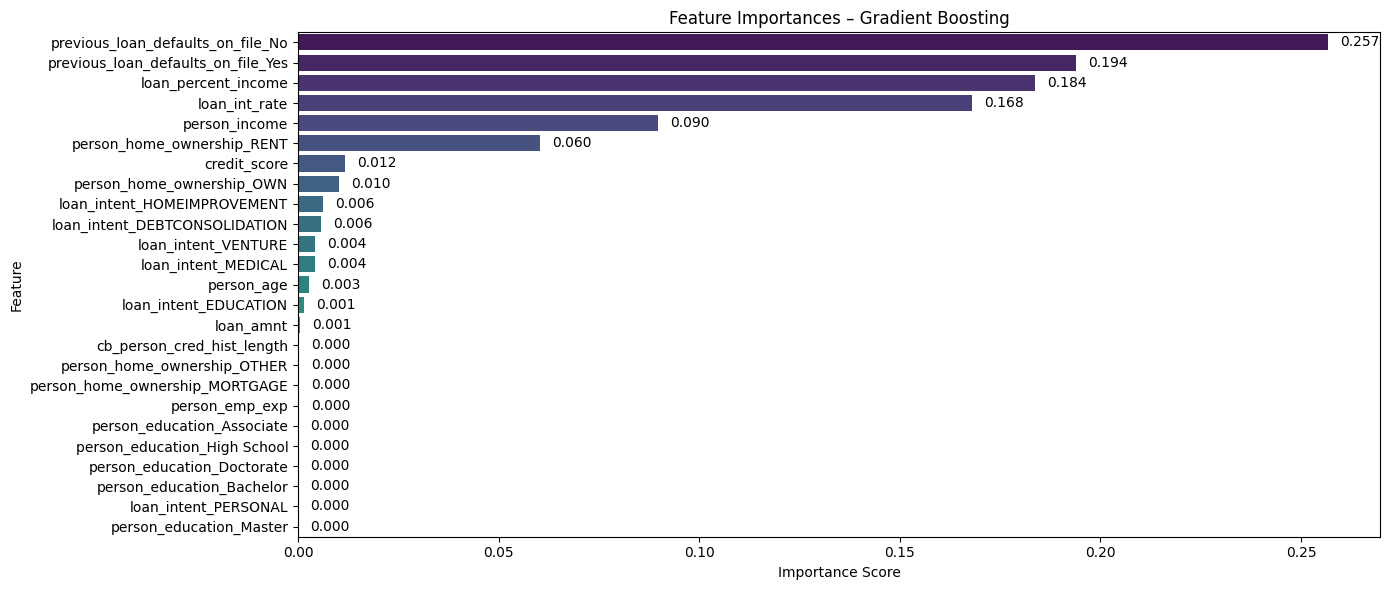

In [27]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': models['Gradient Boosting'].feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot top 15 features
plt.figure(figsize=(14, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis', hue = 'Feature', legend=False)
plt.title("Feature Importances – Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value) in enumerate(feature_importances['Importance']):
    plt.text(value + 0.003, i, f"{value:.3f}", va='center')


plt.tight_layout()
plt.show()

The Feauture Importance of the features before hyperparameter tuning shows that quite a few features do not affect the model's predictive performance.

# 6) Hyperparameter Tuning

In [28]:
print("\n--- Gradient Boosting Parameters ---")
print(models["Gradient Boosting"].get_params())

print("\n--- Random Forest Parameters ---")
print(models["Random Forest"].get_params())


--- Gradient Boosting Parameters ---
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

--- Random Forest Parameters ---
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from joblib import parallel_backend

n_jobs = -1 
# ───── Random Forest Hyperparameter Grid ─────
rf_param_grid = {
    'n_estimators': randint(100, 501),           # More trees can improve performance (100 to 500)
    'max_depth': randint(5, 31),                 # Controls depth to reduce overfitting (5 to 30)
    'min_samples_split': randint(2, 11),         # Minimum samples needed to split a node (2 to 10)
    'min_samples_leaf': randint(1, 5),           # Minimum samples at each leaf node (1 to 4)
    'max_features': ['sqrt', 'log2', None],      # How many features to consider at each split
}

# ───── Gradient Boosting Hyperparameter Grid ─────
gb_param_grid = {
    'n_estimators': randint(100, 501),        
    'learning_rate': uniform(0.05, 0.2),         
    'max_depth': randint(5, 8),             
    'subsample': uniform(0.6, 0.4),        
    'min_samples_split': randint(2, 11),  
    'min_samples_leaf': randint(1, 5),    
    'max_features': ['sqrt', 'log2', None]
}

# Model instances
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# ───── Randomized Search for Random Forest ─────
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=100,                   # Try 50 random combinations
    scoring= 'f1',                  # Optimize for F1-score
    cv=5,                        # 5-fold cross-validation
    verbose=1,                  # Verbose output for progress
    n_jobs=n_jobs,
    random_state=42
)

# ───── Randomized Search for Gradient Boosting ─────
gb_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_param_grid,
    n_iter=100,
    scoring= 'f1',
    cv=5,
    verbose=1,
    n_jobs=n_jobs,
    random_state=42
)

# ───── Tuning with joblib.parallel_backend ─────
# with parallel_backend('threading'): # Use threading for parallel processing
print("\nTuning Random Forest...")
rf_search.fit(X_train, y_train)
print("\nBest Random Forest Parameters Found with RandomizedSearchCV:", rf_search.best_params_)
print("Best Random Forest F1-Score:", rf_search.best_score_)

print("\nTuning Gradient Boosting...")
gb_search.fit(X_train, y_train)
print("\nBest Gradient Boosting Parameters Found with RandomizedSearchCV:", gb_search.best_params_)
print("Best Gradient Boost F1-Score:", gb_search.best_score_)



Tuning Random Forest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Random Forest Parameters Found with RandomizedSearchCV: {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 413}
Best Random Forest F1-Score: 0.8286486166164935

Tuning Gradient Boosting...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Gradient Boosting Parameters Found with RandomizedSearchCV: {'learning_rate': 0.13916655057071825, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 472, 'subsample': 0.8404460046972835}
Best Gradient Boost F1-Score: 0.8513260813688633


**Random Forest (rf_param_grid)**
- n_estimators: randint(100, 501)
More trees generally improve performance but cost more compute—sampling between 100 and 500.

- max_depth: randint(5, 31)
Depth controls how complex each tree can get. 5–30 covers shallow to moderately deep trees, balancing bias vs. variance.

- min_samples_split: randint(2, 11)
The minimum number of samples to split an internal node. Ranging 2–10 tunes how aggressively the forest splits, affecting regularization.

- min_samples_leaf: randint(1, 5)
Minimum samples in each leaf node. Values 1–4 let us prevent leaves with too few samples, smoothing predictions.

- max_features: ['sqrt','log2',None]
Standard

**Gradient Boosting (gb_param_grid)**
- n_estimators: randint(100, 501)
Number of boosting stages (trees). 100–500 allows exploring light to heavy ensembles.

- learning_rate: uniform(0.05, 0.2)
Shrinkage of each tree’s contribution. Sampling 0.05–0.25 balances learning speed vs. stability.

- max_depth: randint(5, 8)
5-8 keeps them each tree small enough to avoid overfitting while capturing non-linearities.

- subsample: uniform(0.6, 0.4)
Fraction of rows used for each tree. 0.6–1.0 injects randomness to reduce variance.

- min_samples_split: randint(2, 11) & min_samples_leaf: randint(1, 5)
Same split/leaf regularization as RF, tuned here for GB’s sequential trees.

- max_features: ['sqrt','log2',None]
Standard

| Model                 | F1-Score   | Notes                                                |
| --------------------- | ---------- | ---------------------------------------------------- |
| **Gradient Boosting** | **0.8513** | Higher overall F1, better precision/recall trade-off |
| Random Forest         | 0.8286     | Still strong and faster to train                     |

After hyperparamter tuning using RandomizedSearchCV, both Random Forest and Gradient Boosting had a increase in their F1-Scores, scoring at higher than before. However, Gradient Boosting outperformed Random Forest and achieved a higher mean cross-validate F1-score of 0.8492 compared to Random Forest's 0.8286.

Hence, this indicates Gradient Boosting achieved a better balance, and is therefore chosen as the final model to use.




 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6999
           1       0.89      0.83      0.86      2000

    accuracy                           0.94      8999
   macro avg       0.92      0.90      0.91      8999
weighted avg       0.94      0.94      0.94      8999



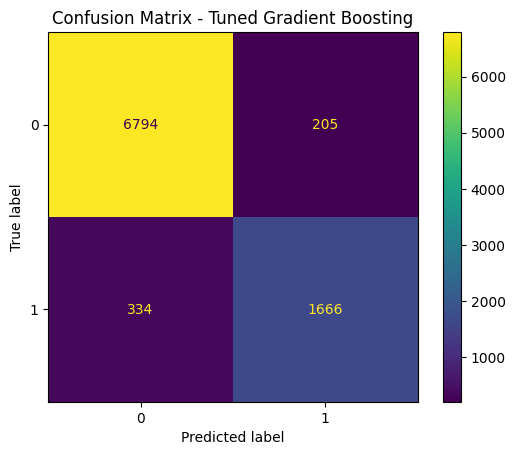

In [32]:
# Use the best tuned Gradient Boosting model
best_gb = gb_search.best_estimator_

# Predict on the test set
y_pred = best_gb.predict(X_test)

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gb.classes_).plot()
plt.title("Confusion Matrix - Tuned Gradient Boosting")
plt.show()

### Gradient Boosting Performance – Before vs After Tuning

| Metric        | Before Tuning | After Tuning |
|---------------|---------------|--------------|
| Precision (Class 1) | 0.89          | 0.89         |
| Recall (Class 1)    | 0.76          | **0.83**     |
| F1-Score (Class 1)  | 0.82          | **0.86**     |
| Accuracy            | 0.93          | **0.94**     |
| Macro Avg F1        | 0.89          | **0.91**     |
| Weighted Avg F1     | 0.92          | **0.94**     |

>  After tuning, the model shows a **significant boost in recall and F1-score for Class 1** (loan approvals), which was the primary class of concern. This means the model is now better at catching true positives without over-approving defaults.


|            | Predicted 0 | Predicted 1 |
| ---------- | ----------- | ----------- |
| **True 0** | 6804 → 6794 (True Rejection) | 195 → 205  (False Approval)|
| **True 1** | 471 → 334 (False Rejection)|  1529 → 1666 (True Approval)|

After tuning, the Gradient Boosting model shows clear improvement in recall and F1-score for Class 1 (loan approvals), with more true positives and fewer false negatives. Although false positives increased slightly (195 → 205), this trade-off is minimal and acceptable given the substantial gain in correctly approving eligible loans. The tuned model is more effective for the business goal and generalizes better on unseen data.

# Feature Importances

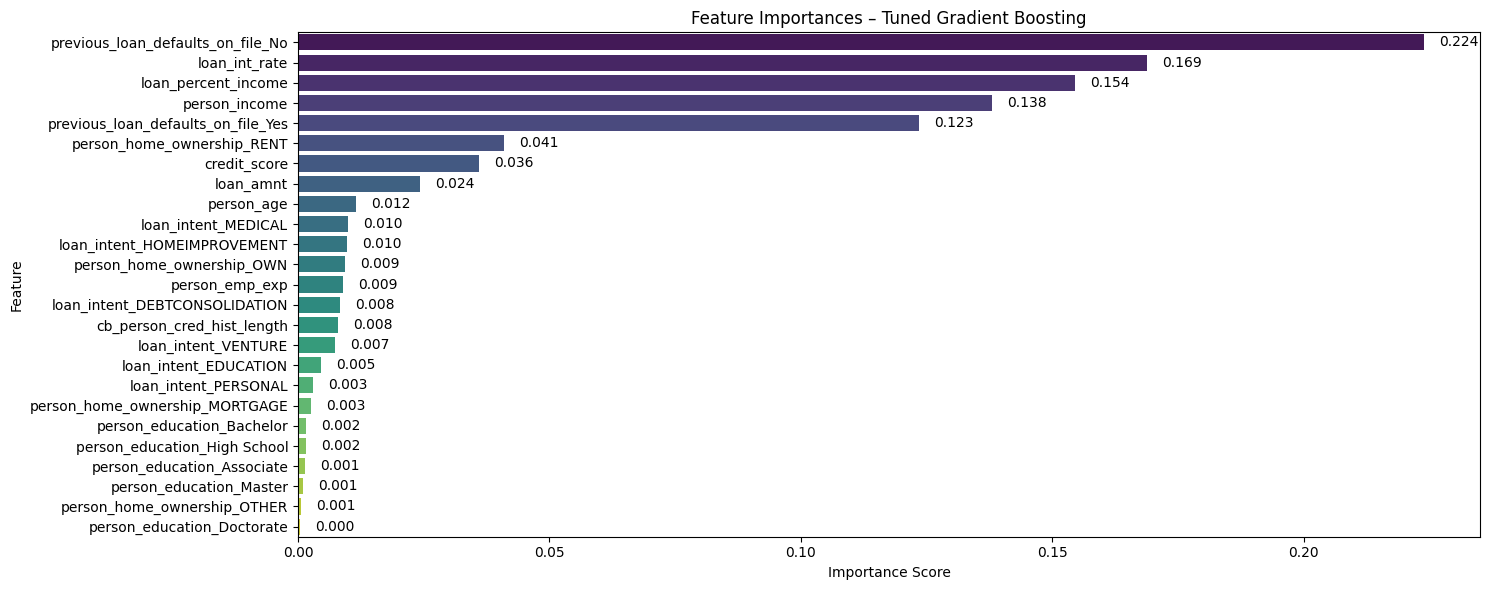

In [34]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gb.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot top 15 features
plt.figure(figsize=(15, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis', hue = 'Feature', legend=False)
plt.title("Feature Importances – Tuned Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value) in enumerate(feature_importances['Importance']):
    plt.text(value + 0.003, i, f"{value:.3f}", va='center')

plt.tight_layout()
plt.show()

###  Comparison of Feature Importances: Before vs. After Tuning

| Feature                                | Pre-Tuning | Post-Tuning | Change  | Interpretation                                                         |
|----------------------------------------|------------|-------------|---------|------------------------------------------------------------------------|
| **previous_loan_defaults_on_file_No**  | 0.257       | 0.224        | –0.033   | Still the single strongest predictor, but its dominance has slightly softened. |
| **previous_loan_defaults_on_file_Yes** | 0.194       | 0.123        | –0.071   | Importance dropped significantly—model now balances “No defaults” against other signals. |
| **loan_percent_income**                | 0.184       | 0.154        | –0.03   | Remains a top 3 feature, but less critical after tuning.    |
| **loan_int_rate**                      | 0.168       | 0.169        | +0.001   | Slight boost—tuning makes interest rate more influential in decision‐making. |
| **person_income**                      | 0.09       | 0.138        | +0.048   | Big gain—income level plays a larger role once deeper trees capture non-linear effects. |
| **person_home_ownership_RENT**         | 0.06      | 0.041        | -0.018  | Renting households become less critical after tuning.           |
| **credit_score**                       | 0.012       | 0.036       | +0.024  | Good increase as credit score gains a bit more weight post-tuning.       |                       |
| **All other features**                 | very low   | very low    | +/-       | All had slight increase to the importance, signifying they have a influence to model's decision making, although very minimal. The only decrease seen was person_home_ownership_OWN by -0.001, making little to no difference to its influence.     |

> **Key takeaway:**  
> After tuning, the model has redistributed importance from the “previous defaults” flags into continuous financial measures (income, interest rate, loan amount). This suggests that the deeper, more numerous trees in the tuned Gradient Boosting model better capture nuanced relationships between numeric features and loan outcomes, while still relying on default history as the primary risk indicator.


In [36]:
# Use joblib.dump to serialize and save the model to a file named 'gb_model.pkl'.
import joblib

joblib.dump(best_gb, 'gb_model.pkl')

['gb_model.pkl']